# Probability

#### Introduction

- Probability : a way of quantifying the uncertainty associated with events chosen from some universe of events.
- Universe consists of all possible outcomes. And any subset of these outcomes is an event. Example: the die rolls a one or a die rolls an even number are examples of an event in an experiment of rolling a die.
- P(E) : The probability of the event E.

#### Dependence and Independence

Two events E and F are dependent if knowing whether E happens gives us information about whether F happens. (Probability of the first event gives information about probability of the second event). Else, E and F are independent.

Example:

1. Independent Events : E = "Heads on first flip" gives us NO INFORMATION about F = "Heads on second flip" or not.
2. Dependent Events : E = "Heads on first flip" gives us information about F = "Both flips are Tails" or not.

Mathematically, two events E and F are independent if probability that E and F both happen P(E,F) is the product of probabilities that each one happens.

$P(E,F) = P(E).P(F)$

#### Conditional Probability

If two events E and F are NOT independent and probability of F is not zero, probability of E conditional on F is given by:

$P(E|F) = P(E,F) / P(F)$

P(E|F) denotes probability that E happens, given that we know that F happens.

Rewriting the conditional probability equation :

$P(E,F) = P(E|F).P(F)$

If E and F are independent events:

$P(E|F) = P(E)$ which is the mathematical way of expressing that knowing F occurred gives us no
additional information about whether E occurred.

Example: Experiment of tossing a coin 3 times, sample space = {HHH, HHT, HTH, THH, TTH, THT, HTT, TTT} = 8

E {Event of atleast 2 tails} = {TTH, THT, HTT, TTT} = 4
F {Event of atleast 1 head} = {HHH, HHT, HTH, THH, TTH, THT, HTT} = 7

Probability of E = 4/8 = 1/2
Probabiliy of F = 7/8

Probability of E given F = Probabiliy of atleast 2 tails given atleast 1 head = {HHT, HTH, THH, TTH, THT, HTT} out of {HHH, HHT, HTH, THH, TTH, THT, HTT} (Our sample space reduces to the event F) = 6/7

Property 1: $P(S|F) = P(F|F) = 1$

$P(S|F) = P(S,F) / P(F) => P(F) / P(F$) {intersection of any event with the sample space is the event itself} = 1
$P(F|F) = P(F,F) / P(F) => P(F) / P(F) = 1$

Property 2: $P(AuB|F) = P(A|F) + P(B|F) - P(A,B|F)$ where A and B are associated with the same sample space and P(F) != 0

If A and B are mutually exclusive i.e. in set theory, are disjoint sets => intersection of A and B is 0.

Property 3: $P(E'|F) = 1 - P(E|F)$

From property 1, we have $P(S|F) = 1$

$P(EuE'|F) = 1$ => from property 2, we have $P(E|F) + P(E'|F) - P(E,E'|F)$ => E and E' are disjoint sets i.e. $P(E,E') = 0$

$1 = P(E|F) + P(E'|F) => P(E'|F) = 1 - P(E|F)$

In [1]:
import random

def random_kid():
    return random.choice(["boy","girl"])

both_girls = 0
older_girls = 0
either_girls = 0

for _ in range(1000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girls += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girls += 1
        
print("P(both | older):", both_girls / older_girls)

P(both | older): 0.5


#### Bayes's Therorem

$P(E|F) = P(E,F)/P(F) = P(F|E).P(E)/P(F)$

$P(E|F).P(F) = P(F|E).P(E)$

#### Random Variables

A random variable is a variable whose possible values have an associated probability distribution.

Example: The range(10) variable has a distribution that assigns probability 0.1 to each of the numbers from 0 to 9.

Expected Value of a random variable: the average of random variable's values weighted by their probabilities.

Example : The coin flip variable has an expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range(10) variable has an expected value of 4.5.

#### Continuous Distributions

We represent a continuous distribution with a probability density function (pdf) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval.

Python’s random.random() is a [pseudo] random variable with a uniform density.

In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

A cumulative distribution function (cdf), which gives the probability that a random variable is less than or equal to a certain value

In [3]:
def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

**Normal Distribution**

It is the classic bell curve-shaped distribution, determined by 2 parameters: it's mean and it's standard deviation. The mean indicates where the bell is centered and the standard deviation how "wide" it is.

In [7]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2) / (sqrt_two_pi * sigma))

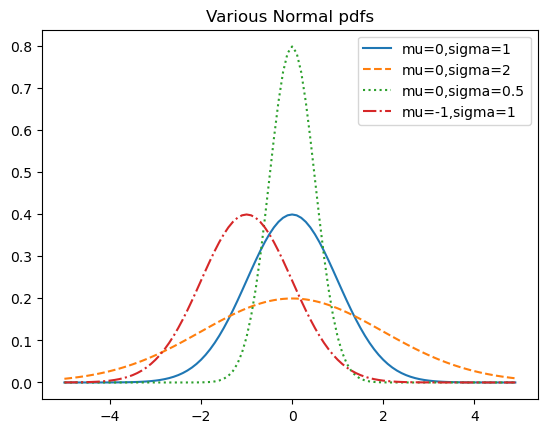

In [8]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

When μ = 0 and σ = 1, it’s called the standard normal distribution.

If X is a normal random variable with mean μ and standard deviation σ, Z = X − μ /σ is a standard normal random variable.

In [9]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

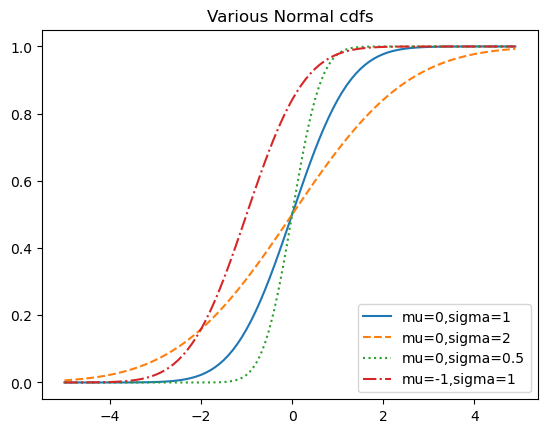

In [10]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

**The Central Limit Theorem**

A random variable defined as the average of a large number of independent and identically distributed random variables is itself noramlly distributed.

In particular, if x1, ..., xn are random variables with mean μ and standard deviation σ, and if n is large, then:

1/n (x1 + ... + xn) is approximately normally distributed with mean μ and standard deviation σ/sqrt(n).

**Binomial Random Variable**

Binomial(n,p) random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with probability 1 − p:

In [11]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

The mean of a Bernoulli(p) variable is p, and its standard deviation is sqrt(p(1 − p)) . The central limit theorem says that as n gets large, a Binomial(n,p) variable is approximately a normal random variable with mean μ = np and standard deviation σ = sqrt(np(1 − p)).